In [1]:
# Program03.ipynb
# Caleb Roge
# Kody Bond

In [2]:
# Load the data into the Pandas dataframe
import pandas as pd

In [3]:
pd.set_option('precision', 4)

In [4]:
esports_df = pd.read_csv('Program1_dataset.csv')
esports_df.shape

(62, 6)

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.set_style('whitegrid')

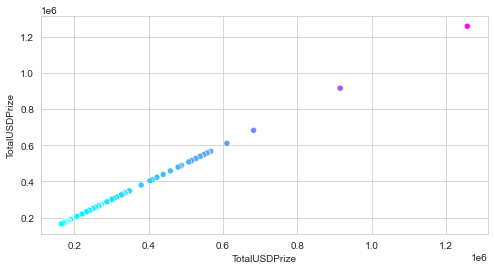

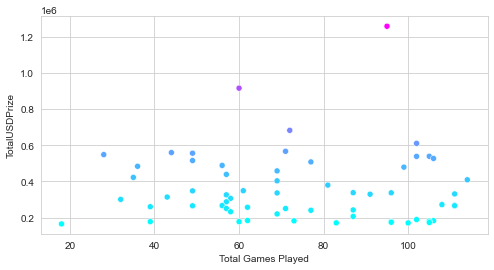

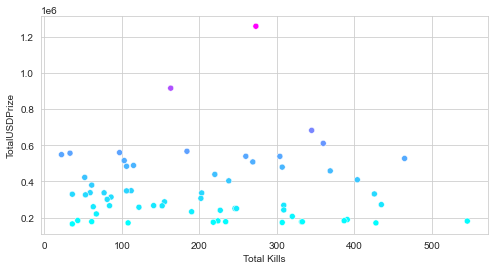

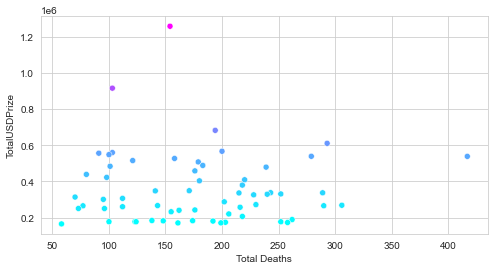

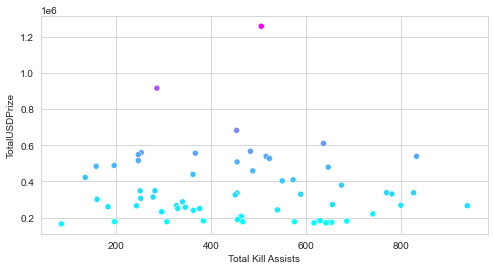

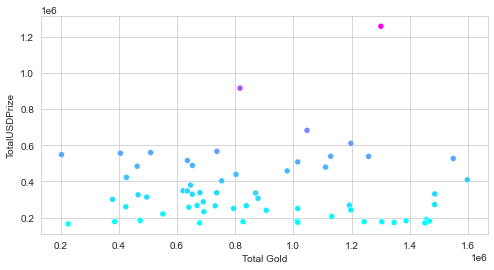

In [8]:
for feature in esports_df.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=esports_df, x=feature, y='TotalUSDPrize',
                    hue='TotalUSDPrize', palette='cool', legend=False)

In [9]:
# split the data for training and testing
from sklearn.model_selection import train_test_split

In [10]:
X = esports_df.drop(columns=['TotalUSDPrize'])
y = esports_df['TotalUSDPrize']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7) 

In [12]:
X_train.shape

(46, 5)

In [13]:
X_test.shape

(16, 5)

In [14]:
# Training the model
from sklearn.linear_model import LinearRegression

In [15]:
linear_regression = LinearRegression()

In [16]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [17]:
for i, name in enumerate(esports_df.columns):
    if i < len(esports_df.columns) - 1:
        print(f"{name}: {linear_regression.coef_[i]}")

TotalUSDPrize: -4070.126291488909
Total Games Played: -1221.1018740335805
Total Kills: 165.64348561612542
Total Deaths: -41.16099981907031
Total Kill Assists: 0.6318867678162405


In [18]:
# Test the model

In [19]:
predicted = linear_regression.predict(X_test)

In [20]:
expected = y_test

In [21]:
predicted[:5]

array([282093.15750191, 305855.21949968, 287363.97265116, 321742.47523547,
       425746.88133192])

In [22]:
expected[:5]

15    479060.15
2     682248.64
35    268282.03
27    330849.29
31    306475.81
Name: TotalUSDPrize, dtype: float64

In [23]:
# Regression Model Metrics
from sklearn import metrics

In [24]:
metrics.r2_score(expected, predicted)

-0.2757149504527594

In [25]:
metrics.mean_squared_error(expected, predicted)

19881326851.777153

In [26]:
# Choosing the best model
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [27]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [28]:
from sklearn.model_selection import KFold, cross_val_score

In [29]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X, y=y, cv=kfold, scoring='r2')
    print(f"{estimator_name:>16} mean of r2 scores = {abs(scores.mean()):.3f}")

LinearRegression mean of r2 scores = 0.493
      ElasticNet mean of r2 scores = 0.492
           Lasso mean of r2 scores = 0.493
           Ridge mean of r2 scores = 0.493
